In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Loading(Data Source: JHU)

In [4]:
confirmed_df  = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')

In [5]:
confirmed_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20,5/13/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,2894,3224,3392,3563,3778,4033,4402,4687,4963,5226
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,803,820,832,842,850,856,868,872,876,880
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,4648,4838,4997,5182,5369,5558,5723,5891,6067,6253
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,750,751,751,752,752,754,755,755,758,760
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,35,36,36,36,43,43,45,45,45,45


In [6]:
cols = confirmed_df.keys()
confirmed  = confirmed_df.loc[:, cols[4]:]
confirmed.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20,5/13/20
0,0,0,0,0,0,0,0,0,0,0,...,2894,3224,3392,3563,3778,4033,4402,4687,4963,5226
1,0,0,0,0,0,0,0,0,0,0,...,803,820,832,842,850,856,868,872,876,880
2,0,0,0,0,0,0,0,0,0,0,...,4648,4838,4997,5182,5369,5558,5723,5891,6067,6253
3,0,0,0,0,0,0,0,0,0,0,...,750,751,751,752,752,754,755,755,758,760
4,0,0,0,0,0,0,0,0,0,0,...,35,36,36,36,43,43,45,45,45,45


# COVID19 Country/Region Cases Comparison

## Legend:

- RED: Critical
- BLUE: Mid-level
- GREEN: Stable

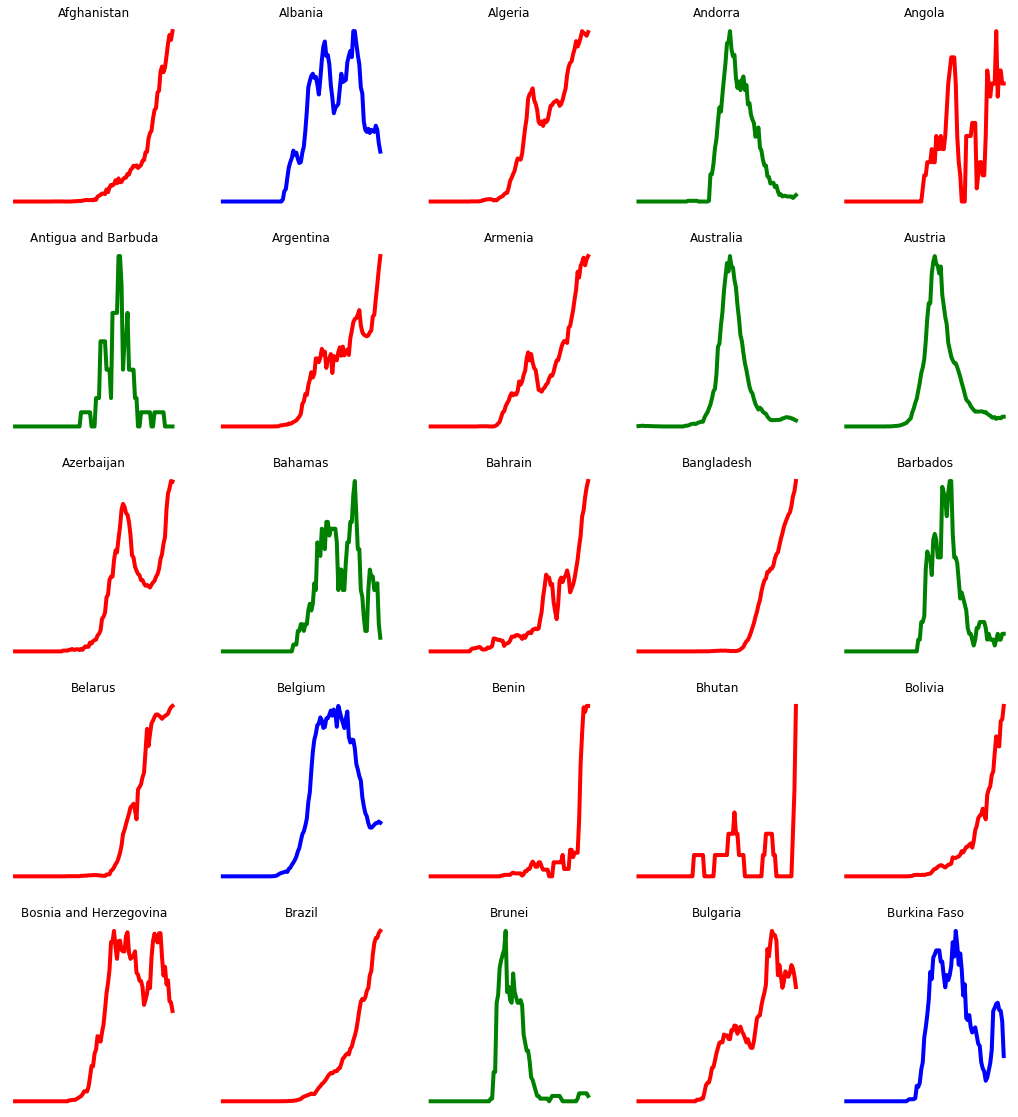

In [7]:
dates   = confirmed.keys()
country_reg = confirmed_df['Country/Region'].unique()

def plot_cases(start = 0, batch_sz= 25, columns = 5): 
    rows    = int(np.ceil(batch_sz/columns))
    fig     = plt.figure(figsize=(18, 4*rows))
    color   = None

    for i in range(1, columns*rows + 1):
        idx = start + i
        if idx <= len(country_reg):
            country = country_reg[idx-1]
            cases = pd.Series([confirmed_df[confirmed_df['Country/Region']==country][i].sum() for i in dates])
            cases_ma = cases.rolling(window=7).mean().diff()
            height = cases_ma.max() - cases_ma.min()
            if cases_ma.iloc[-1] <= 0.2*height:
                color = 'green'
            elif cases_ma.iloc[-1] <= 0.5*height:
                color = 'blue'
            else:
                color = 'red'
            fig.add_subplot(rows, columns, i)
            plt.plot(range(len(dates)), cases_ma, linewidth=4, color = color)
            plt.title(f'{country}')
            plt.axis('off')

    plt.show()
    
k = 0    
plot_cases(k)

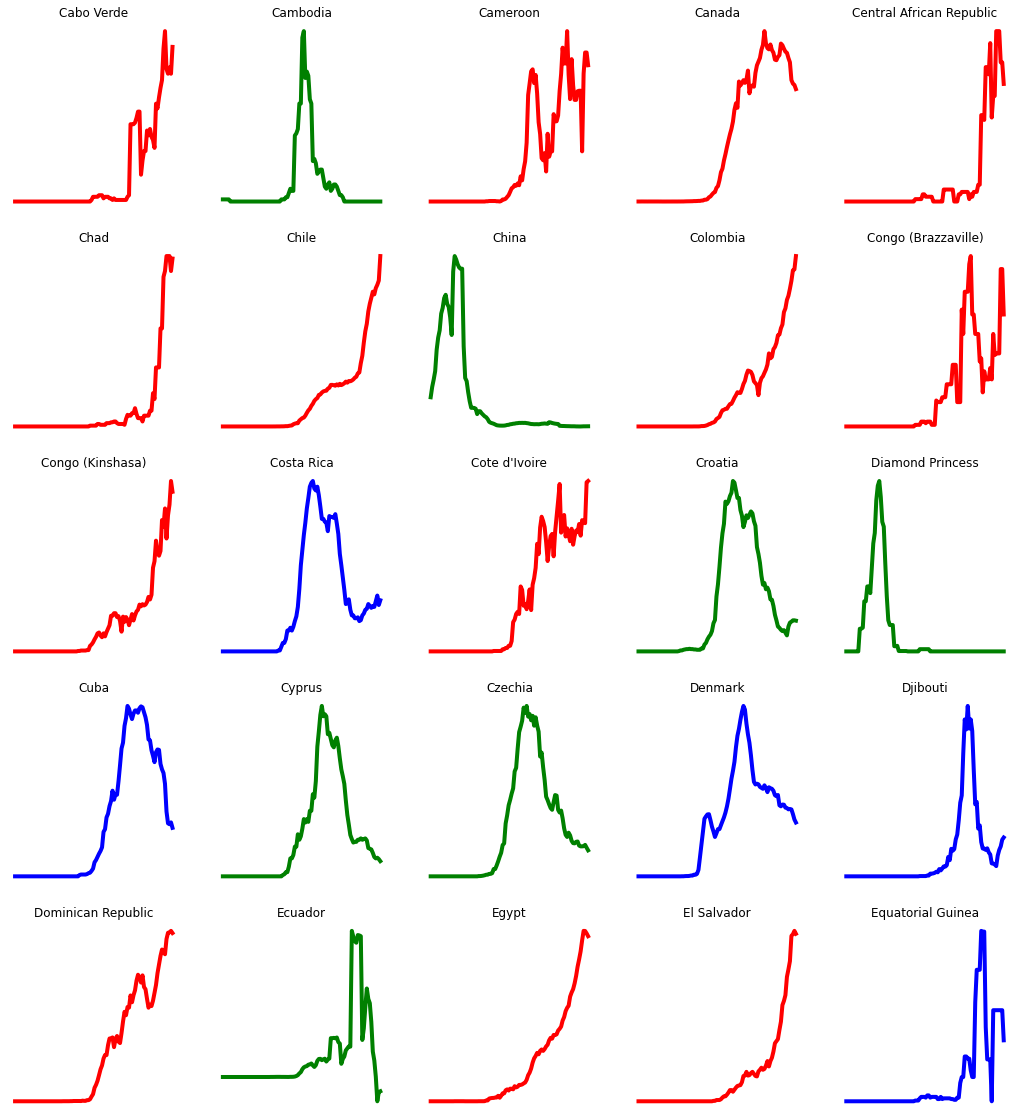

In [8]:
k += 25
plot_cases(k)

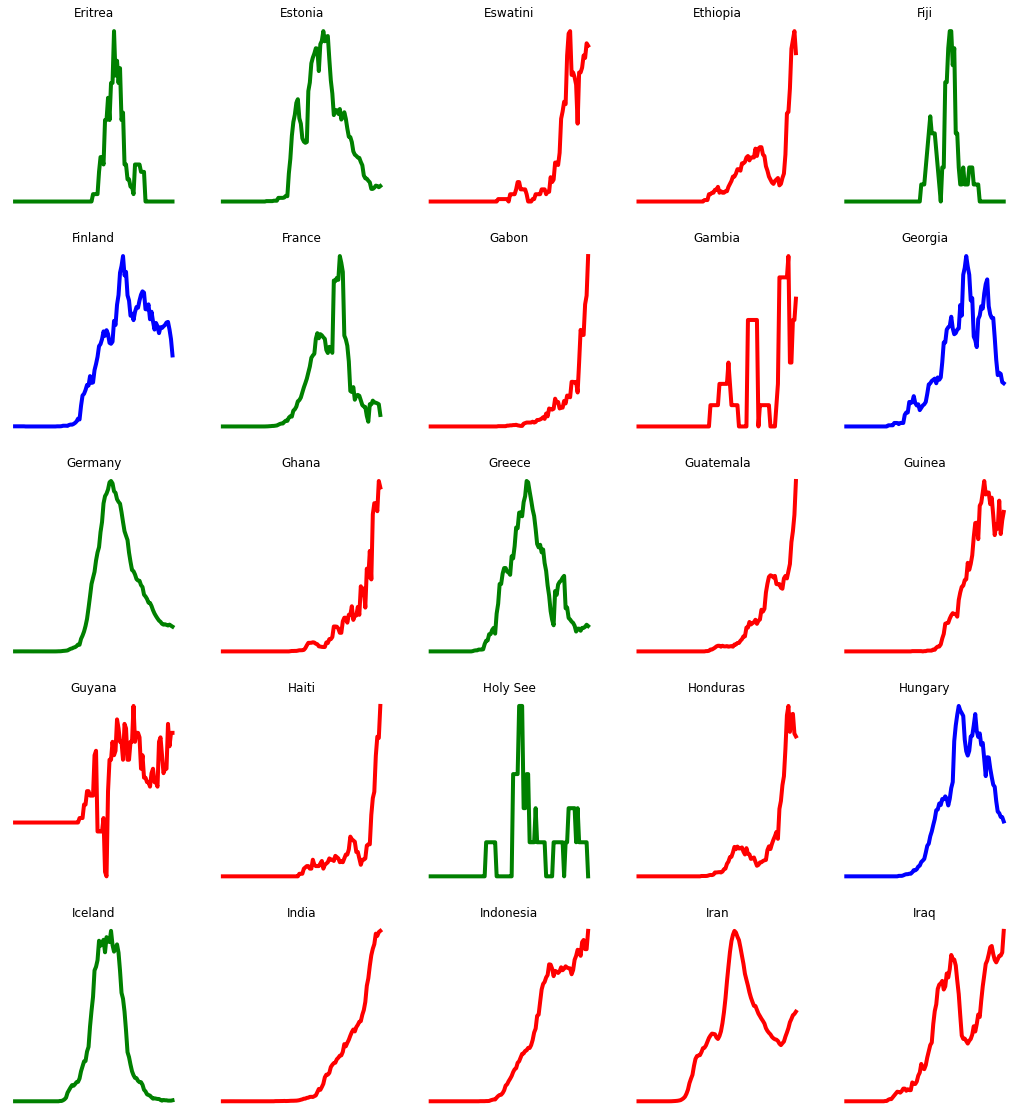

In [9]:
k += 25
plot_cases(k)

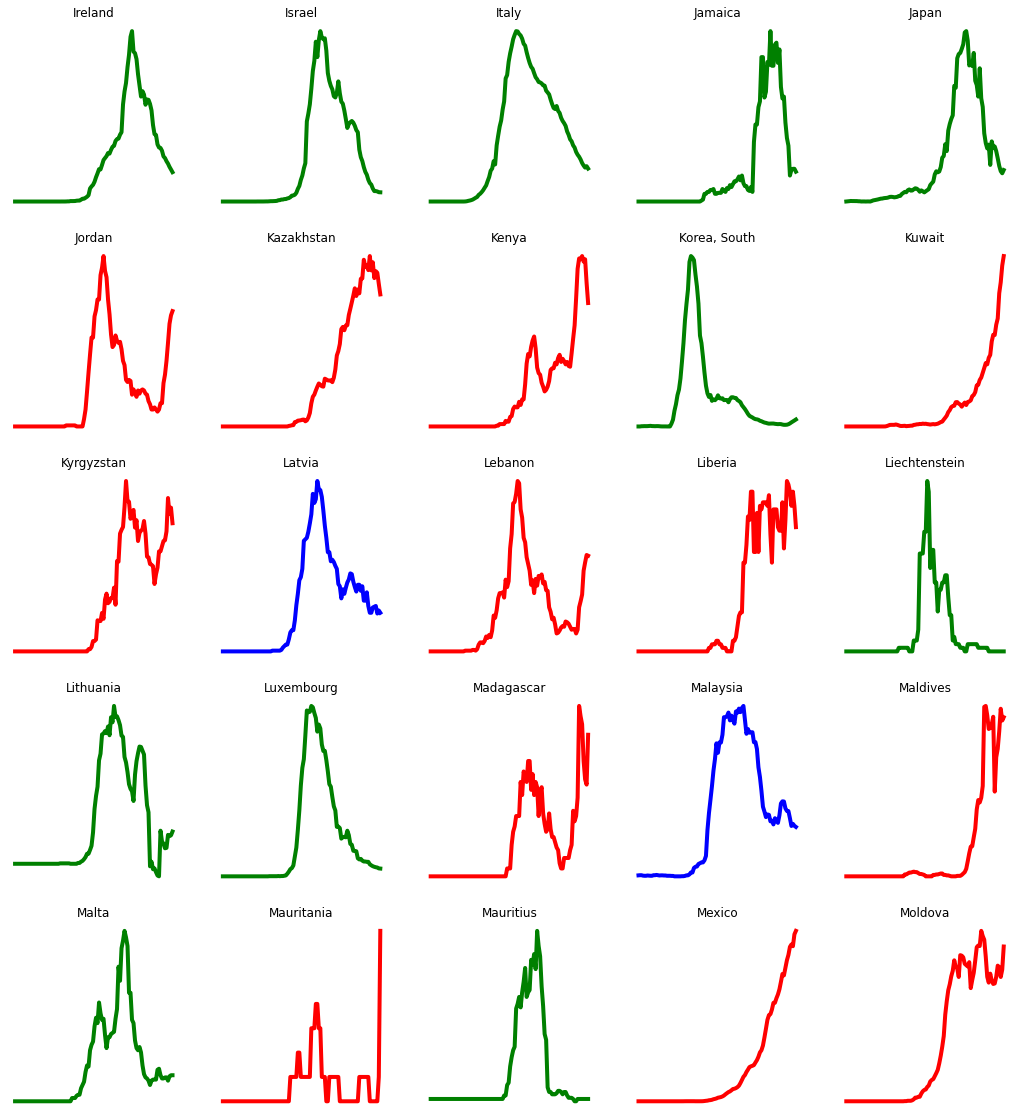

In [10]:
k += 25
plot_cases(k)

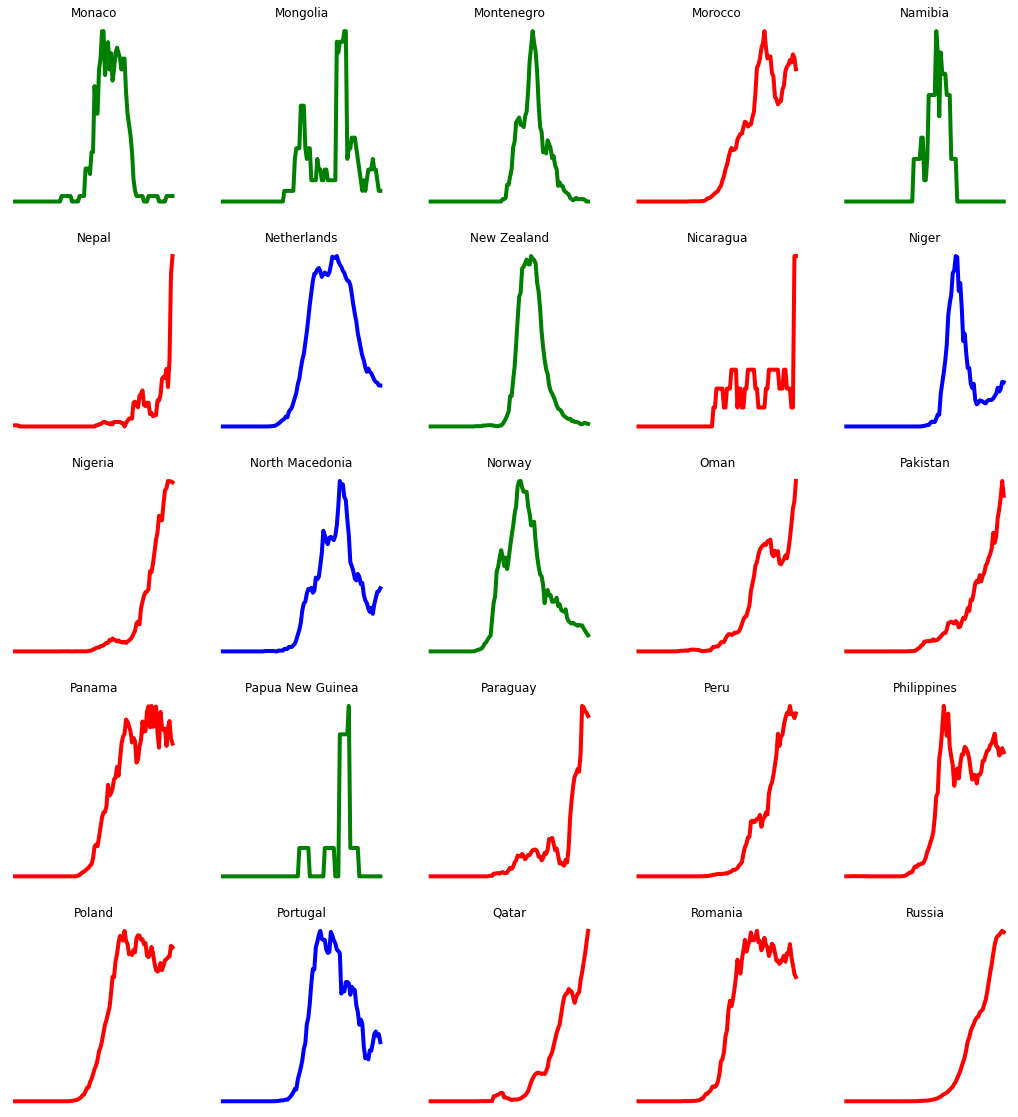

In [11]:
k += 25
plot_cases(k)

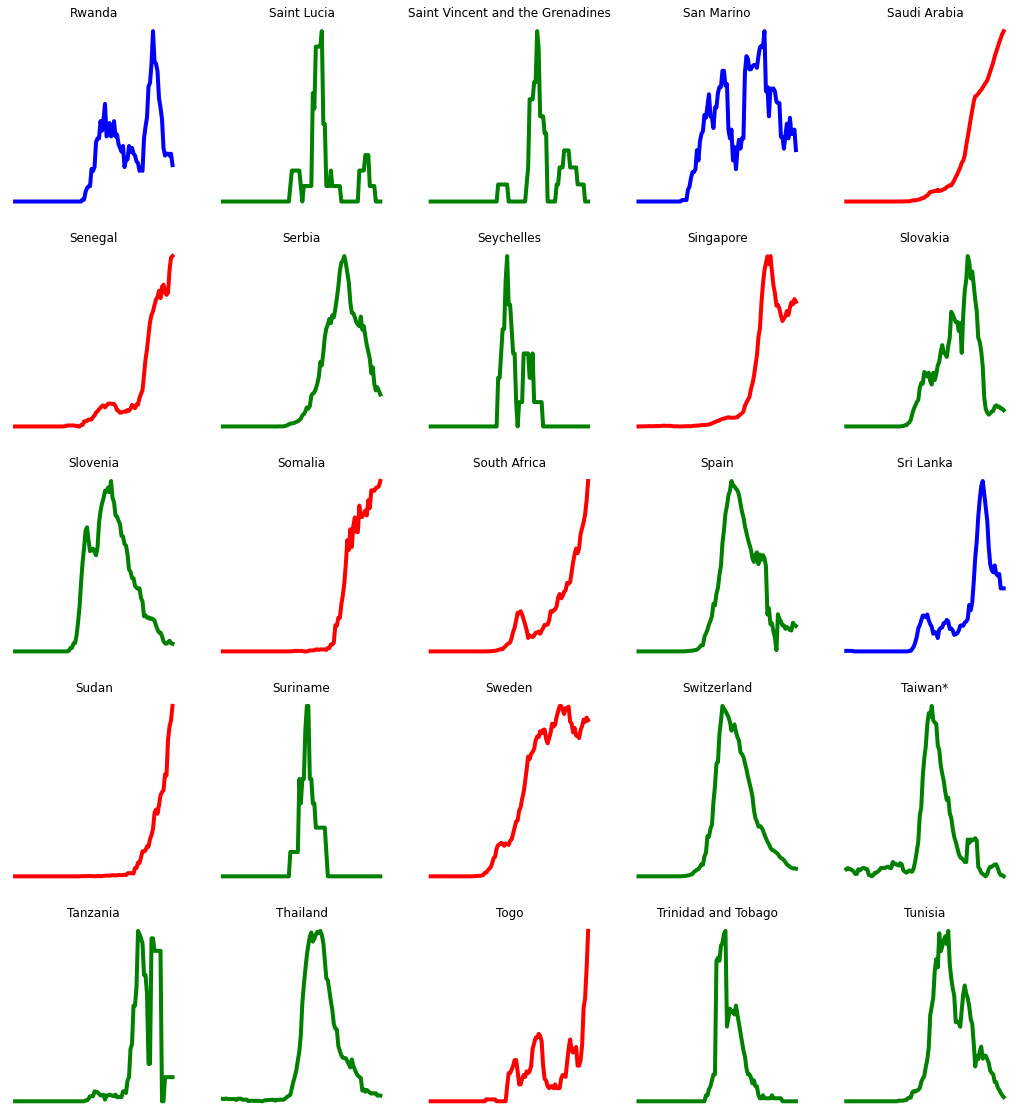

In [12]:
k += 25
plot_cases(k)

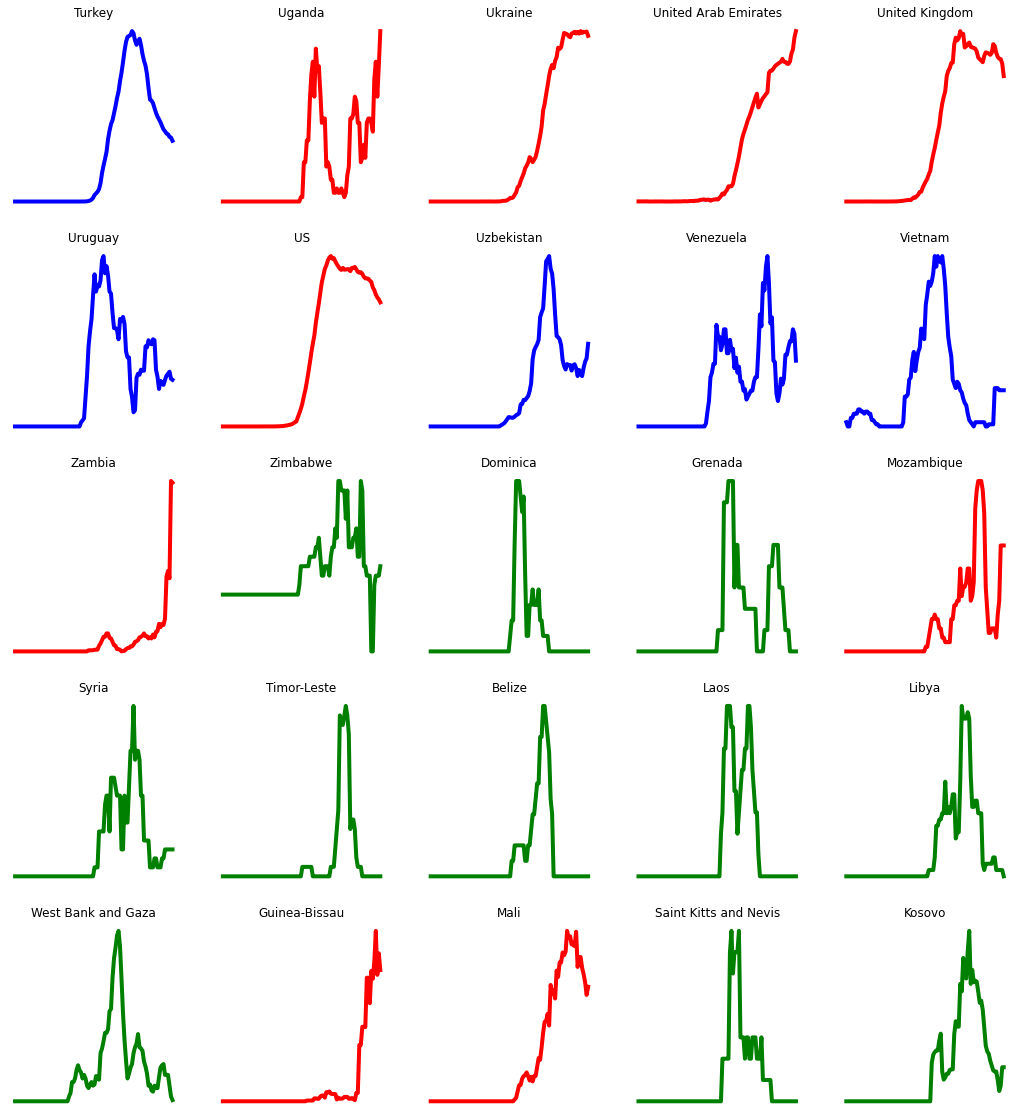

In [13]:
k += 25
plot_cases(k)

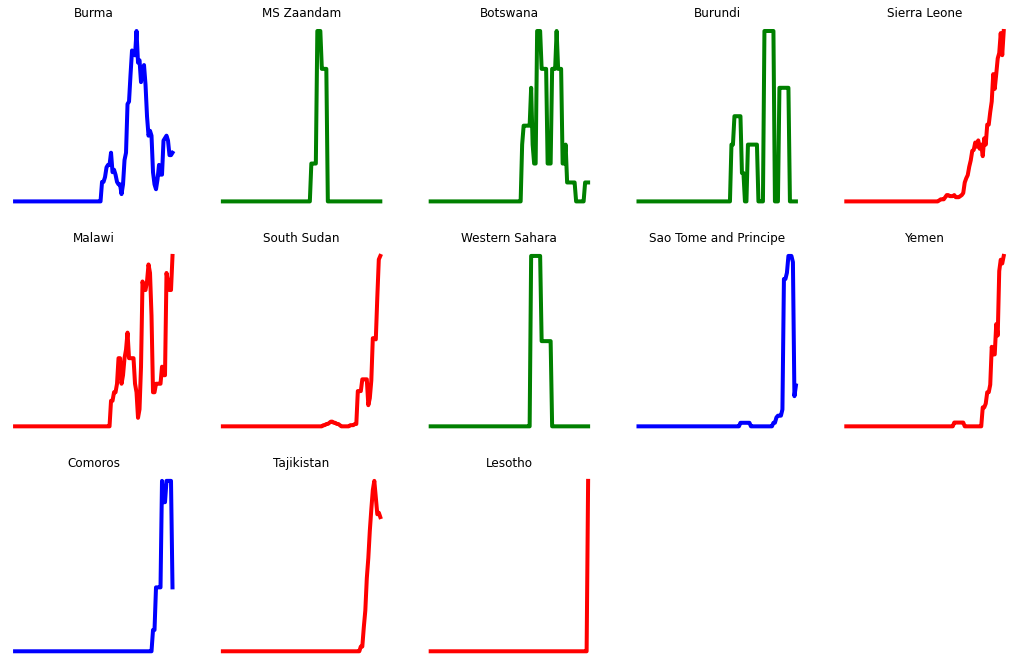

In [14]:
k += 25
plot_cases(k)

# COVID19 ASEAN Cases Comparison

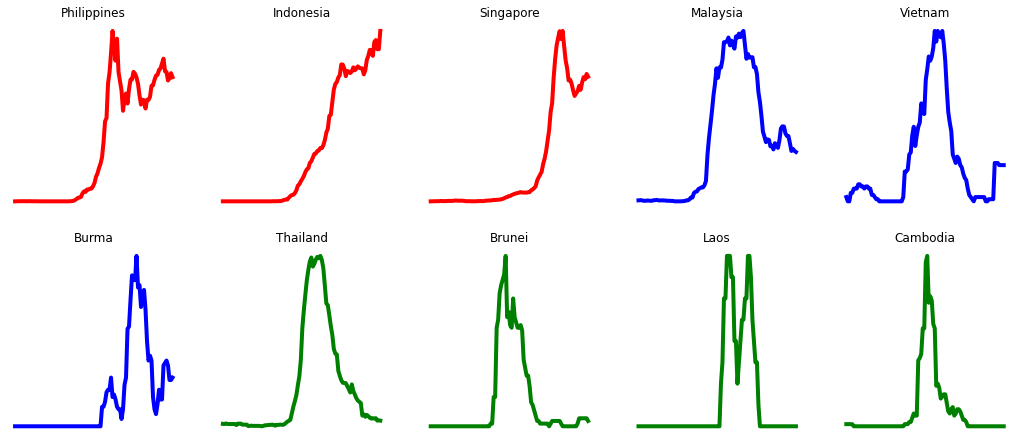

In [17]:
dates   = confirmed.keys()
ASEAN = ['Philippines', 'Indonesia',  'Singapore', 'Malaysia', 'Vietnam', 'Burma', 'Thailand', 'Brunei', 'Laos', 'Cambodia']

def plot_cases2(country_list, start = 0, batch_sz= 25, columns = 5): 
    rows    = int(np.ceil(batch_sz/columns))
    fig     = plt.figure(figsize=(18, 4*rows))
    color   = None

    for i in range(1, columns*rows + 1):
        idx = start + i
        if idx <= len(country_list):
            country = country_list[idx-1]
            cases = pd.Series([confirmed_df[confirmed_df['Country/Region']==country][i].sum() for i in dates])
            cases_ma = cases.rolling(window=7).mean().diff()
            height = cases_ma.max() - cases_ma.min()
            if cases_ma.iloc[-1] <= 0.2*height:
                color = 'green'
            elif cases_ma.iloc[-1] <= 0.5*height:
                color = 'blue'
            else:
                color = 'red'
            fig.add_subplot(rows, columns, i)
            plt.plot(range(len(dates)), cases_ma, linewidth=4, color = color)
            plt.title(f'{country}')
            plt.axis('off')

    plt.show()
    
    
plot_cases2(ASEAN)

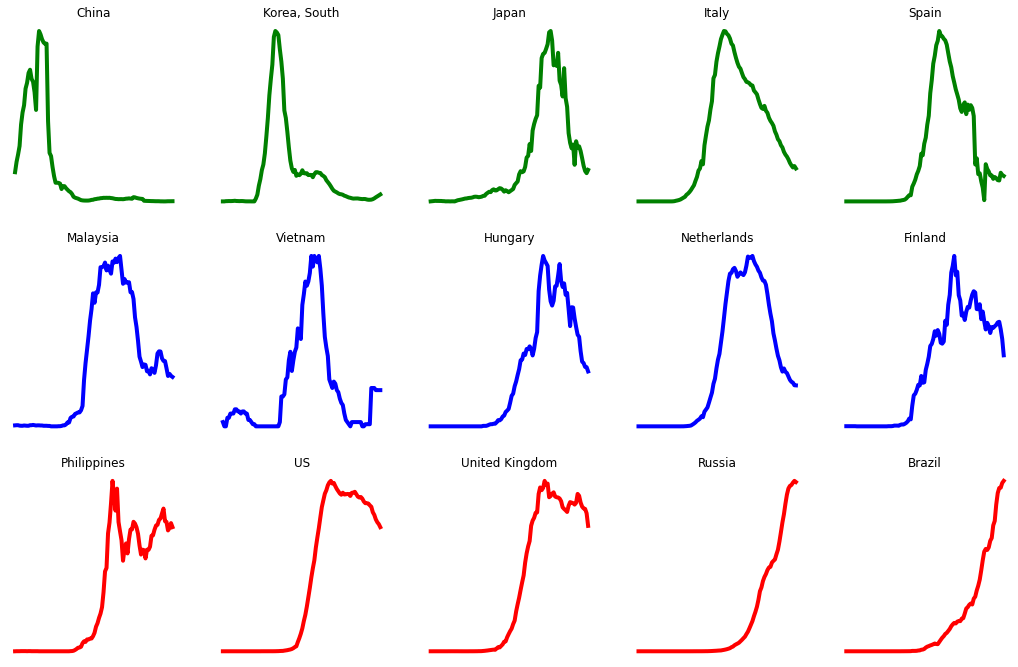

In [18]:
Assorted = ['China', 'Korea, South', 'Japan', 'Italy', 'Spain', 'Malaysia', 'Vietnam', 'Hungary', 'Netherlands', 'Finland','Philippines', 'US',  'United Kingdom','Russia',  'Brazil']

plot_cases2(Assorted)

> Disclaimer: *Educational purposes ONLY and is not intended to be used in any other purposes, including but not limited to any political agenda and so on*.